Процент самого глубокого снижения (от стартовой цены): 
 85.73749999999998 %

Время расчетов в секундах:  87.52999070000078
Файл создан: 
 Result_Coins_2020_02_17_Art.csv 

[ 10.49788835  17.1523619   12.4144619   29.19963261  27.50050326
   8.83176801  11.49998092  12.67028034  22.58757282   6.2757723
  15.06129938 -14.24578291  -1.7946831   10.0343609   12.22661875
   1.2558619    7.56564305  22.04003881  18.54524305  12.22720285
  17.32312485  17.03127944  22.1779109    3.59923594  23.57650137
  14.54982517 -10.03474771  19.05534704  10.98547283   8.95232147
   6.26307188  16.02887243  17.37808925 -17.3535086   19.695447
  -3.07674282  -3.2399289    8.73858588  10.6444402   -0.90737069
  11.3179989    1.57847001  18.64088212   4.15973427   1.53552897
   9.68872818  17.94178436  18.01420431  11.43196146  28.52259954
   1.42256813  -3.33173423  19.53561074  23.4422071   19.17600092
  16.89519225  11.52800627  20.62708321  17.76537611  12.15611293
   7.84629424  -3.70566321   0.5491585

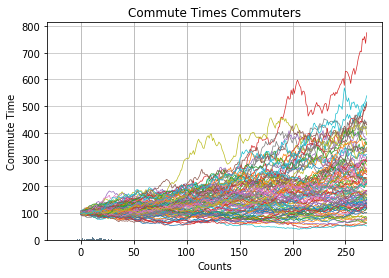

сер. профіт 11.439109930630016


In [7]:
import pandas as pd
import math as m
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer


def  GBM_generator(mu, sigma, T, dt, S0):
    N = round(T / dt)
    t = np.linspace(0, T, N)
    W = np.random.standard_normal(size=N)
    W = np.cumsum(W) * np.sqrt(dt)  ### standard brownian motion ###
    X = (mu - 0.5 * sigma ** 2) * t + sigma * W
    S = S0 * np.exp(X)  ### geometric brownian motion ###

    return t, S

def prod(j, array):
    p = 1
    if j == 0:
        return p * (1 - array[0])
    else:
        return prod(j-1, array) * (1-array[j])


def transform_csv(df):

    # print("Кол-во строк в таблице (старт): \n", len(df), "\n")
    # print("Таблица (оглавление) (старт): \n", df.head(10), "\n")

    df['p_sell'] = 0
    df['p_buy'] = 0
    df['day_profit'] = 0
    df['total_profit'] = 0
    df['sell/buy'] = 0
    df['count_sell'] = 0
    df['count_buy'] = 0
    df['count_total_buy'] = 0
    df['costs_of_bying'] = 0
    df['sum_invested'] = 0

    # print("Таблица (оглавление) (после добавления столбцов): \n", df.head(), "\n")



def model_5k(df):

    column_p_sell = 'p_sell'
    column_p_buy = 'p_buy'
    column_price = 'Price'
    column_sell_buy = 'sell/buy'
    column_day_profit = 'day_profit'
    column_profit = 'total_profit'
    column_count_sell = 'count_sell'
    column_count_buy = 'count_buy'
    column_count_total_buy = 'count_total_buy'
    column_costs_of_bying = 'costs_of_bying'
    column_sum_invested = 'sum_invested'
    column_ticker = 'ticker'

    p0 = df.loc[0, column_price]

    # визначаємо яку кількість акцій потрібно купувати на відповідному етапі докуповування
    number = []
    for j in range(0, len(amounts_S)):
        if j == 0:
            number.append(amounts_S[j] / p0)
        else:
            number.append(amounts_S[j] / (p0 * prod(j, procent)))

    k0 = number[0]
    K = k0
    S0 = k0 * p0
    C = S0
    Profit = 0
    t = 0
    p_sell = p0 * (1 + r / 100)
    p_buy = p0 * (1 - procent[1])

    df.loc[0, column_p_sell] = p_sell
    df.loc[0, column_p_buy] = p_buy
    df.loc[0, column_sell_buy] = 'buy'
    df.loc[0, column_day_profit] = K * df.loc[0, column_price] - C
    df.loc[0, column_profit] = Profit
    df.loc[0, column_count_buy] = k0
    df.loc[0, column_count_total_buy] = K
    df.loc[0, column_costs_of_bying] = S0
    df.loc[0, column_sum_invested] = C

    for i in range(1, len(df)):
        count_days[t] = count_days[t] + 1
        # count_days

        if df[column_price][i] > p_sell:
            if t < len(amounts_S):
                count_step[t] = count_step[t] + 1
                # count_step
                size_profit[t] = size_profit[t] + K * df[column_price][i] - C
                # size_profit
            else:
                pass
            Profit = Profit + (K * df[column_price][i] - C)
            df.loc[i, column_profit] = Profit
            df.loc[i, column_count_sell] = K

            p0 = df[column_price][i]
            p_sell = p0 * (1 + r / 100)
            p_buy = p0 * (1 - procent[1])

            df.loc[i, column_p_sell] = p_sell
            df.loc[i, column_p_buy] = p_buy
            df.loc[i, column_sell_buy] = 'sell'
            df.loc[i, column_day_profit] = K * df.loc[i, column_price] - C
            df.loc[i, column_sum_invested] = C

            number = []
            for j in range(0, len(amounts_S)):
                if j == 0:
                    number.append(amounts_S[j] / p0)
                else:
                    number.append(amounts_S[j] / (p0 * prod(j, procent)))
            k0 = number[0]
            K = k0
            S0 = k0 * p0
            C = S0
            t = 0

        elif df[column_price][i] < p_buy:
            t = t + 1

            if t < len(amounts_S):
                k0 = number[t]
                K = K + k0
                p0 = df[column_price][i]
                S0 = k0 * p0
                C = C + S0

                p_sell = (C / K) * (1 + r_fin / 100)

                if (t + 1) < len(amounts_S):
                    p_buy = p0 * (1 - procent[1])
                else:
                    p_buy = p0 * (1 - procent_loss / 100)

                df.loc[i, column_p_sell] = p_sell
                df.loc[i, column_p_buy] = p_buy
                df.loc[i, column_profit] = Profit
                df.loc[i, column_sell_buy] = 'buy'
                df.loc[i, column_count_buy] = k0
                df.loc[i, column_count_total_buy] = K
                df.loc[i, column_costs_of_bying] = S0
                df.loc[i, column_sum_invested] = C

            elif t == len(amounts_S):
                count_step[t] = count_step[t] + 1
                count_step
                df.loc[i, column_day_profit] = K * df.loc[i, column_price] - C
                size_profit[t] = size_profit[t] + K * df[column_price][i] - C
                df.loc[i, column_sell_buy] = 'StopLoss'
                df.loc[i, column_count_sell] = K
                df.loc[i, column_sum_invested] = C

                Profit = Profit + K * df[column_price][i] - C
                df.loc[i, column_profit] = Profit

                p0 = df[column_price][i]
                p_sell = p0 * (1 + r / 100)
                p_buy = p0 * (1 - procent[1])

                df.loc[i, column_p_sell] = p_sell
                df.loc[i, column_p_buy] = p_buy

                number = []
                for j in range(0, len(amounts_S)):
                    if j == 0:
                        number.append(amounts_S[j] / p0)
                    else:
                        number.append(amounts_S[j] / (p0 * prod(j, procent)))
                #                 print('Stoploss', K * df[column_price][i] - C)
                k0 = number[0]
                K = k0
                C = k0 * p0
                t = 0
        else:
            df.loc[i, column_p_sell] = df.loc[i - 1, column_p_sell]
            df.loc[i, column_p_buy] = df.loc[i - 1, column_p_buy]
            df.loc[i, column_profit] = Profit
            df.loc[i, column_sum_invested] = C
            df.loc[i, column_sell_buy] = 'waiting'

    df['day_profit'] = round(df['day_profit'], 0)
    df['total_profit'] = round(df['total_profit'], 0)
    #     df['Date'] = pd.to_datetime(df['Date'], format="%Y/%m/%d")
    df['p_buy'] = round(df['p_buy'], 2)
    df['p_sell'] = round(df['p_sell'], 2)
    df['count_buy'] = round(df['count_buy'], 2)
    df['count_sell'] = round(df['count_sell'], 2)
    df['count_total_buy'] = round(df['count_total_buy'], 2)
    df['costs_of_bying'] = round(df['costs_of_bying'], 2)
    df['sum_invested'] = round(df['sum_invested'], 2)

    return df, Profit


# START
start = timer()


T = 270
mu = 0.002885601
sigma = 0.029523375
S0 = 100
dt = 1
count_experiment = 100

# procent = [0, 0.05, 0.05, 0.5] = 20% profit
# amounts_S = [12.5, 12.5, 25, 50] = 20% profit

# procent = [0, 0.05, 0.1, 0.15] = 12.6% profit
# amounts_S = [12.5, 12.5, 25, 50] = 12.6% profit

procent = [0, 0.05, 0.05, 0.05] # = 17.85% profit
amounts_S = [12.5, 12.5, 25, 50]

# procent = [0, 0.15, 0.2, 0.25, 0.30] - Artem's values
# amounts_S = [1000, 1000, 2000, 4000, 8000] - Artem's values

r_fin = 0.0001
procent_loss = 0.25
r = 30
count_step = [0]*(len(amounts_S) + 1)
size_profit = [0]*(len(amounts_S) + 1)
count_days = [0]*(len(amounts_S) + 1)
file_result_name = 'Result_Coins_2020_02_17_Art.csv'

print("Процент самого глубокого снижения (от стартовой цены): \n", prod(3, procent)*100, "%\n")

d = {'Date': [1, 2], 'Price': [3, 4]}
df = pd.DataFrame(data=d)

profits_generated = np.zeros(count_experiment)
total_profit = 0

for i in range(0, count_experiment):
    gbm_t, gbm_S  = GBM_generator(mu, sigma, T, dt, S0)
    d = {'Date': gbm_t, 'Price': gbm_S}
    df = pd.DataFrame(data=d)
    transform_csv(df)
    df, profit = model_5k(df)
    profits_generated[i] = profit
    total_profit = total_profit + profit
#     print(profits_generated)
#     print(total_profit)
#     print(np.mean(profits_generated))
    plt.plot(gbm_t, gbm_S, linewidth=0.7)


duration = timer() - start
print("Время расчетов в секундах: ", duration)

# print("Result TAB \n", df.head(), "\n")

df.to_csv(file_result_name, sep = ';', index=False,)
print("Файл создан: \n", file_result_name, "\n")


# Result = df[['Date','total_profit']]
# print(Result, profit)

print(profits_generated)
# print(total_profit)
print(i)


# Generate data on commute times.
# size, scale = 1000, 10
commutes = pd.Series(profits_generated)

commutes.plot.hist(grid=True, bins=50, rwidth=0.9,
                   color='#607c8e')
plt.title('Commute Times Commuters')
plt.xlabel('Counts')
plt.ylabel('Commute Time')
plt.grid(axis='y', alpha=0.75)
plt.show()

print("сер. профіт", (np.mean(profits_generated)))